<a href="https://colab.research.google.com/github/GaneshkumarPatel/NYC-trip-duration-prediction/blob/main/with_speed_model_of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
# !pip install lux
# !pip install klib

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path='/content/drive/MyDrive/almabetter/capstone projects/NYC taxi trip duration -regression/'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline


In [ ]:

import klib


In [48]:
df=pd.read_csv(path+'NYC Taxi Data.csv')


# Data Exploration

In [ ]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day_name,pickup_hour,pickup_weekday,pickup_minute,pickup_day,dropoff_day,dropoff_day_name
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,Monday,17,0,24,2016-03-14,2016-03-14,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,Sunday,0,6,43,2016-06-12,2016-06-12,Sunday


In [ ]:
df.tail(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day_name,pickup_hour,pickup_weekday,pickup_minute,pickup_day,dropoff_day,dropoff_day_name
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,Tuesday,15,1,56,2016-01-05,2016-01-05,Tuesday
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198,4,Tuesday,14,1,44,2016-04-05,2016-04-05,Tuesday


In [5]:
df.dtypes.value_counts()

object     4
float64    4
int64      3
dtype: int64

We have to change datatype of our datetime columns from object to datetime dtype

In [ ]:
df.describe(include='object')

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
count,1458644,1458644,1458644,1458644
unique,1458644,1380222,1380377,2
top,id2875421,2016-03-04 08:07:34,2016-02-19 19:25:04,N
freq,1,5,5,1450599


In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


1. we can see our datatypes are correctly identified and assigned to it respectively and it reduced our data storage memory by 42%
2.From above its clear that id column has every row as unique record thus we can drop this column as it will not add any benefit in regression

In [ ]:
##just checking for any duplicates
df[df.duplicated()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration


In [ ]:

df.drop('id',axis=1,inplace=True)


In [7]:
df.isnull().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Some observations about data:
1. id column has unique value same as number od records, this column will not be useful for regression purpose.
2. passenger_count and trip_duration both columns has measurable difference between their mean and meadian, its a sign of skewness. we will have to close look those columns for skewness and outlier presence.
3. we dont have any missing value in our dataset

**Feature Extraction from given data**

In [ ]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df.dropoff_datetime = pd.to_datetime(df.dropoff_datetime)



df['pickup_month']=df.pickup_datetime.dt.month
df['pickup_day_name']=df.pickup_datetime.dt.day_name()
df['pickup_hour']=df.pickup_datetime.dt.hour
df['pickup_weekday']=df.pickup_datetime.dt.weekday
df['pickup_minute']=df.pickup_datetime.dt.minute
df['pickup_day']=df.pickup_datetime.dt.date
df['dropoff_day']=df.dropoff_datetime.dt.date
df['dropoff_day_name']=df.dropoff_datetime.dt.day_name()


# Univariate analysis
**used to check distributions of features , presence of outliers, in short it helps to clean data in well manner**

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


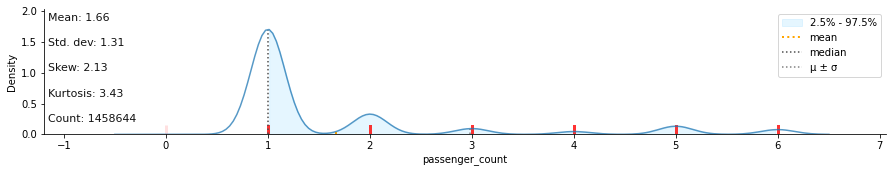

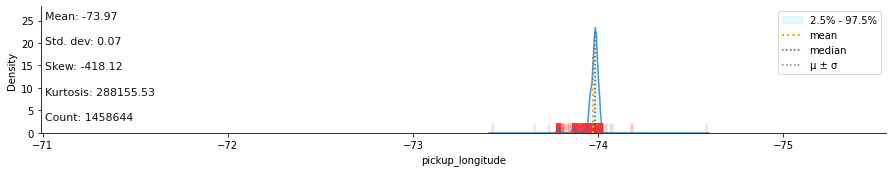

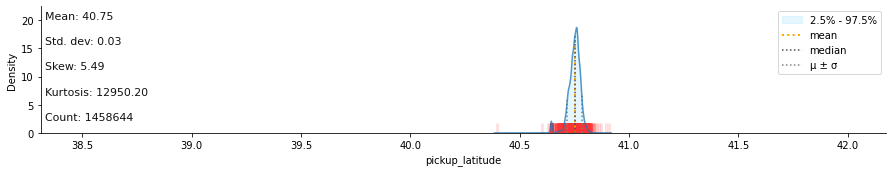

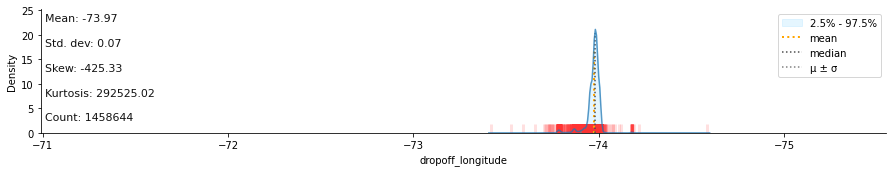

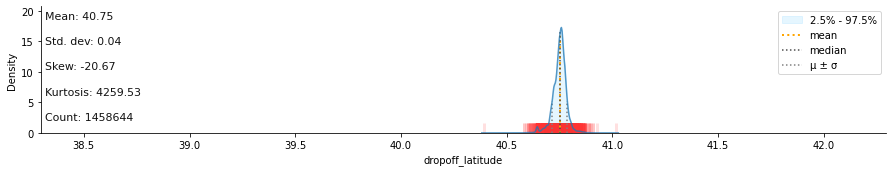

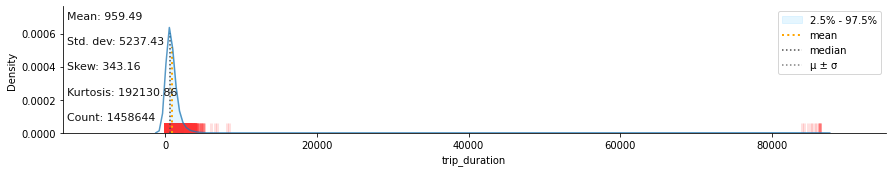

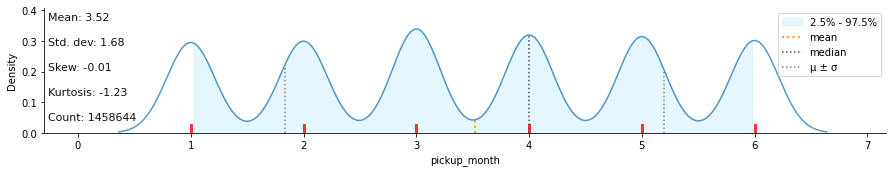

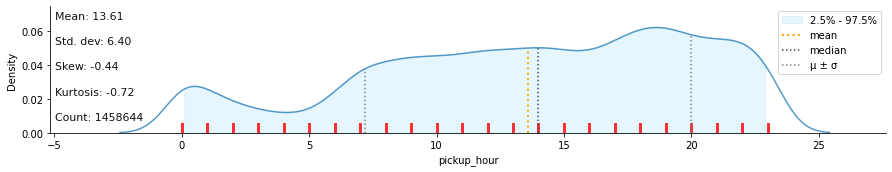

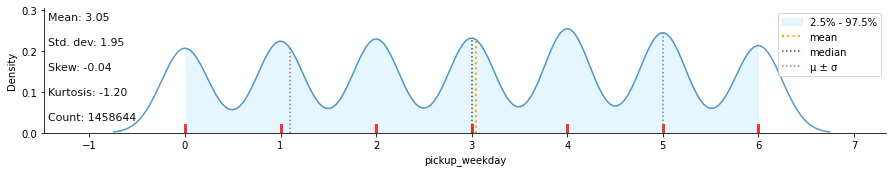

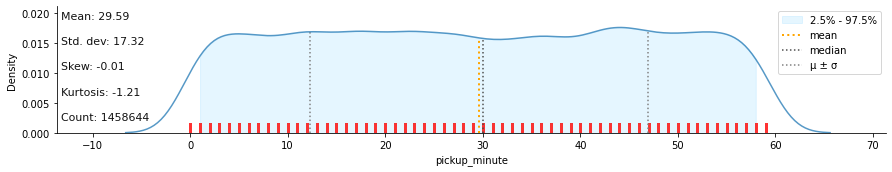

In [ ]:
# lets plot distribution to infer some insigts from available features

klib.dist_plot(df)

In [ ]:
# Outliers Visualization
def numeric_columns_plot(df):
  import warnings
  warnings.filterwarnings('ignore')
  import seaborn as sns
  ncols= len(df.columns) if len(df.columns) < 6 else 6
  nrows= int(len(df.columns)/5) if len(df.columns) > 6 else 1
  fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 10))
  index = 0
  axs = axs.flatten()
  for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

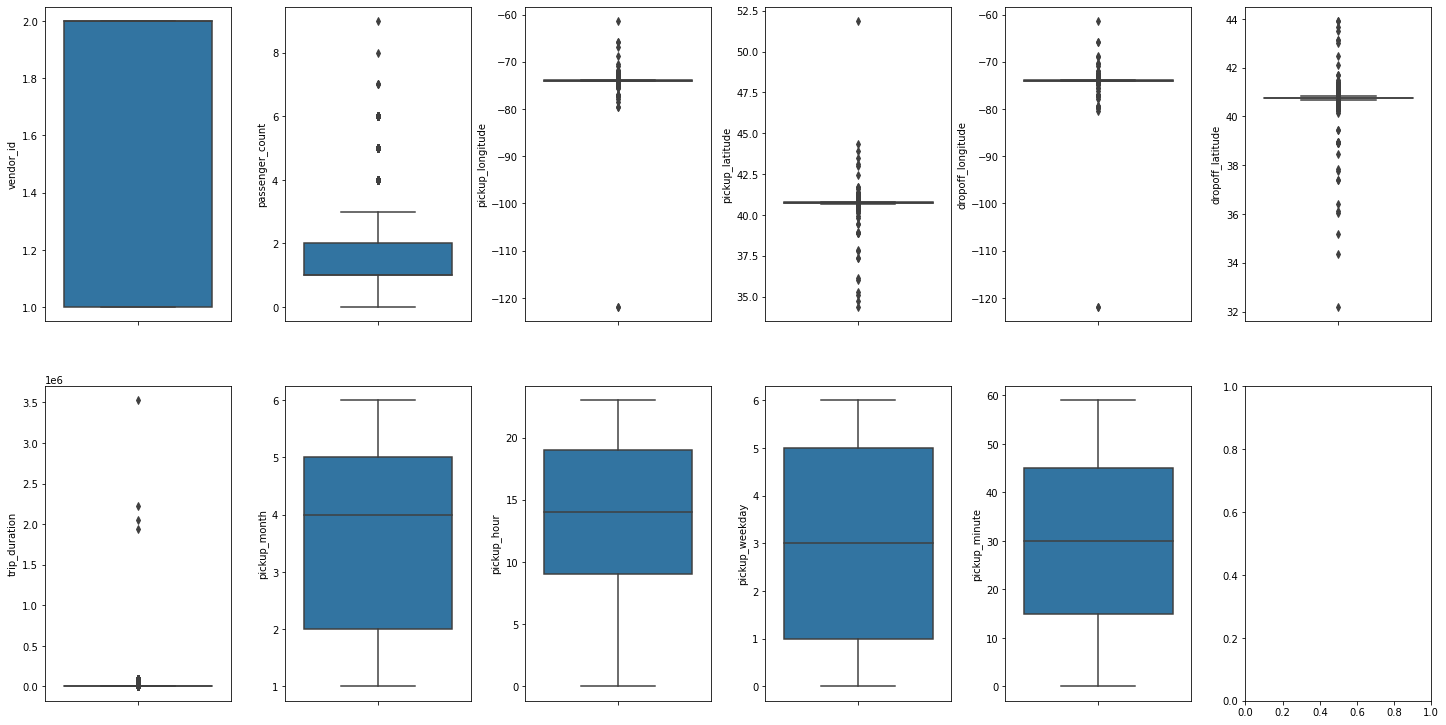

In [ ]:
numeric_columns_plot(df[df.describe().columns])

In [ ]:
# plot a boxplot for the label by each categorical feature  
def categorical_features_plot(df,target_continuous):
  import warnings
  warnings.filterwarnings('ignore')
  for col in df.describe(include='object').columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = target_continuous, by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel(target_continuous)
plt.show()

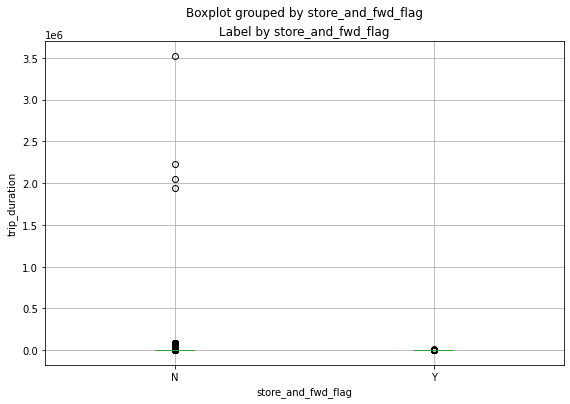

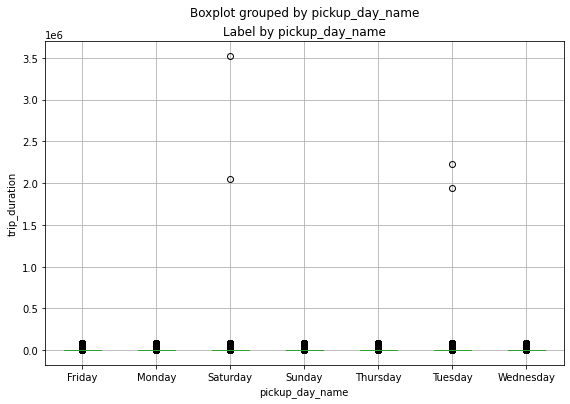

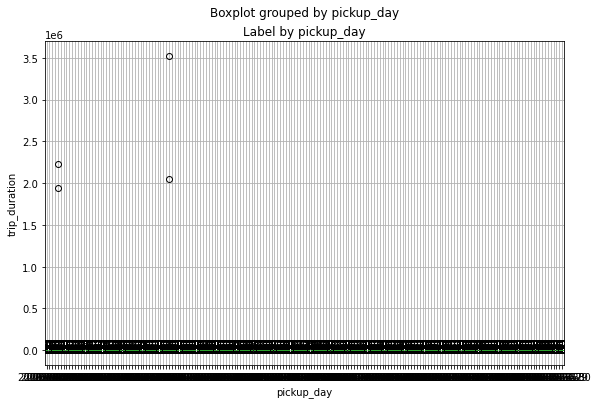

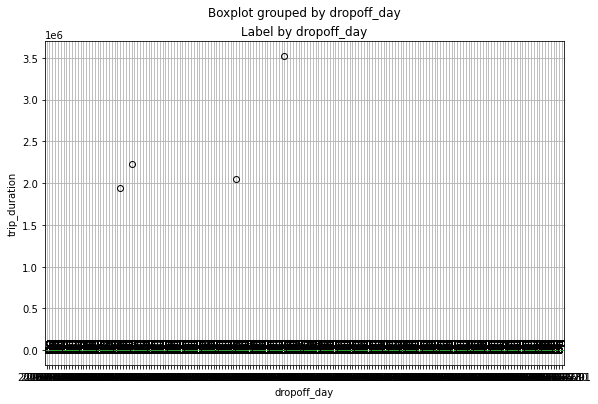

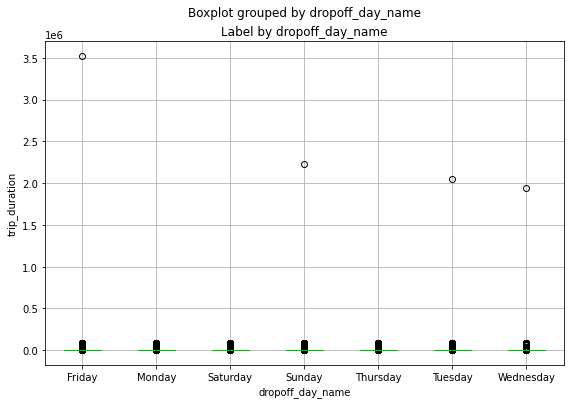

In [ ]:
categorical_features_plot(df,'trip_duration')

From above plots its clear that we have to focus more on passenger_count column and trip_duration column for outlier treatment

In [52]:
# checking for trips having more than one day duration
df[(df.trip_duration>86400)] # 24*60*60=86400 its a total seconds in a day

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration


we came to know **4 no. of trip records** are having **more than 15 days trip duration** which seems to be unlikely thus we will trating it as **outlier**

Also We can see that the trip_duration field contains values in the range of 1-3526282. So let's exclude the data that lies outisde 2 standard deviations from the mean.

In [50]:
#defining function for outlier removal more than 2 std deviation

def std_dev_otliier_removal(df,column_name):
  m = np.mean(df[column_name])
  std = np.std(df[column_name])
  df = df[df[column_name] <= m + 3*std]
  df = df[df[column_name] >= m- 3*std]
  return df


In [51]:
df=std_dev_otliier_removal(df,'trip_duration')
df.shape

(1456571, 10)

Now looking into the longitude the coordinates lies between (-74.53,-72.71) and the latitude coordinates lies between (40.44,41.09).
But the pickup_latitude and pickup_longitude and dropoff_latitude and dropoff_laongitude lies outside this range. So let's clean them.

In [58]:
df=std_dev_otliier_removal(df,'pickup_latitude')
df=std_dev_otliier_removal(df,'pickup_longitude')

df=std_dev_otliier_removal(df,'dropoff_latitude')
df=std_dev_otliier_removal(df,'dropoff_longitude')

df.shape



(1324664, 10)

In [22]:
 df.passenger_count.value_counts()

1    1032274
2     210008
5      77869
3      59777
6      48200
4      28348
0         59
7          3
9          1
8          1
Name: passenger_count, dtype: int64

1. We came to know that there are some entries where passenger counts are zero, this record might be representing the canceled trips but for our usecase it becomes not useful so we treat it as an outlier
2. passenger count contains some 7,8,9 values those doesn't have any weightage to stand with 14 billon records data and As its a driver entered value its error chances increases, so we can treat them also as an outlier.

In [35]:
#lets clean passenger count data
df_nz=df[(df.passenger_count>0) & (df.passenger_count<7)]

AttributeError: ignored

In [37]:
grouped_passenger_trip_duration = df_nz.groupby('passenger_count')['trip_duration'].mean()
plt.title('Distribution of trip_duration with respect to the trip_duration')
sns.barplot(grouped_passenger_trip_duration.index,grouped_passenger_trip_duration.values)
plt.show()

KeyError: ignored

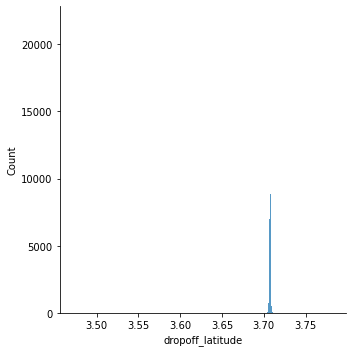

In [27]:
# sns.displot(np.log(df['dropoff_latitude']))

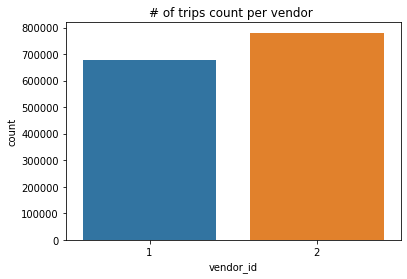

In [ ]:
# Vendor count
sns.countplot(x=df_nz.vendor_id)
plt.title('# of trips count per vendor ')
plt.show()

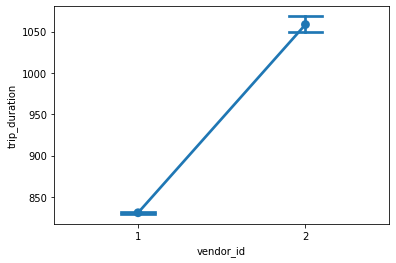

In [ ]:
sns.pointplot(x="vendor_id", y="trip_duration", data=df_nz, capsize=.2)

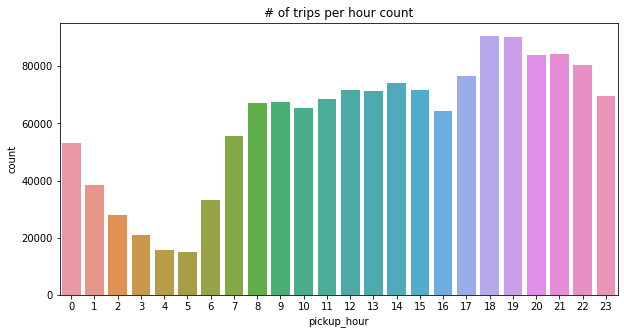

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df_nz.pickup_hour)
plt.title('# of trips per hour count')
plt.show()

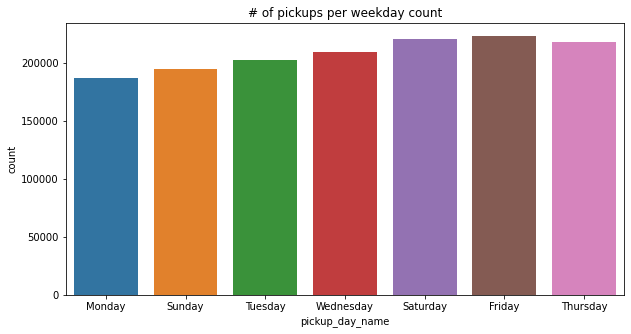

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df_nz.pickup_day_name)
plt.title('# of pickups per weekday count')
plt.show()

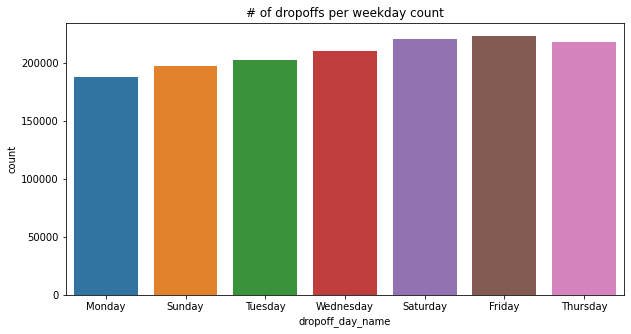

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df_nz.dropoff_day_name)
plt.title('# of dropoffs per weekday count')
plt.show()

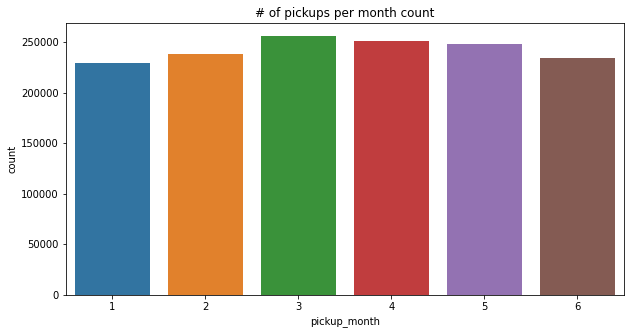

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df_nz.pickup_month)
plt.title('# of pickups per month count')
plt.show()

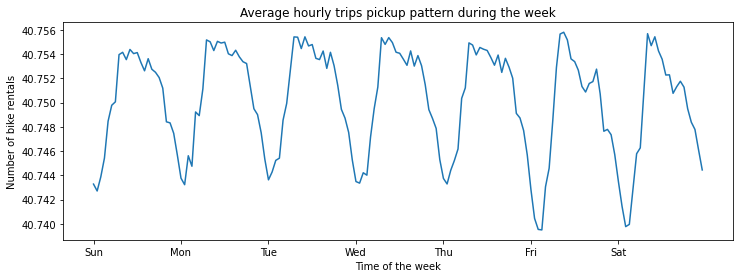

In [ ]:
#We can check for sesonality for pickups in a week on hourly basis

fig, ax = plt.subplots(figsize=(12, 4))
average_week_demand = df_nz.groupby(["pickup_weekday","pickup_hour"])['pickup_latitude'].mean()
average_week_demand.plot(ax=ax)
_ = ax.set(
    title="Average hourly trips pickup pattern during the week",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],
    xlabel="Time of the week",
    ylabel="Number of bike rentals")

We came to know that seasonality present in our data on weekday basis following some pattern in order to make model to understand these pattens we can convert our time data to cyclic  periods
Reference - https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html

to capture the natural periodicity we will use trignometric features(sin,cos). 

# Feature Engineering

In [ ]:
df_nz.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'pickup_month', 'pickup_day_name', 'pickup_hour', 'pickup_weekday',
       'pickup_minute', 'pickup_day', 'dropoff_day', 'dropoff_day_name'],
      dtype='object')

In [ ]:
# As we discussed earlier we will drive trignometric features for time data.

df_nz['month_sin']=df_nz['pickup_month'].apply(lambda x: np.sin(x / 12 * 2 * np.pi))

df_nz['weekday_sin']=df_nz['pickup_weekday'].apply(lambda x: np.sin(x / 7 * 2 * np.pi))

df_nz['hour_sin']=df_nz['pickup_hour'].apply(lambda x: np.sin(x / 24 * 2 * np.pi))


In [ ]:
# functions for extracting features from lattitude and longitude

# Haversine distance
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # km
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  #  km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h 

# Manhattan distance
# Taxi cant fly ! have to move in blocks/roads
def get_manhattan_distance(lat1, lng1, lat2, lng2):
    # km 
    a = get_haversine_distance(lat1, lng1, lat1, lng2)
    b = get_haversine_distance(lat1, lng1, lat2, lng1)
    return a + b


# get direction (arc tangent angle)
def get_direction(lat1, lng1, lat2, lng2):
    # theta
    AVG_EARTH_RADIUS = 6371  #  km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))




In [ ]:
df_nz['haversine_distance']=get_haversine_distance(df_nz['pickup_latitude'].values,df_nz['pickup_longitude'].values,df_nz['dropoff_latitude'].values,df_nz['dropoff_longitude'].values)

df_nz['manhattan_distance']=get_manhattan_distance(df_nz['pickup_latitude'].values,df_nz['pickup_longitude'].values,df_nz['dropoff_latitude'].values,df_nz['dropoff_longitude'].values)

df_nz['trip_direction']=get_direction(df_nz['pickup_latitude'].values,df_nz['pickup_longitude'].values,df_nz['dropoff_latitude'].values,df_nz['dropoff_longitude'].values)

df_nz['center_latitude'] = (df_nz['pickup_latitude'].values + df_nz['dropoff_latitude'].values) / 2
df_nz['center_longitude'] = (df_nz['pickup_longitude'].values + df_nz['dropoff_longitude'].values) / 2


In [ ]:
df_nz['avg_speed_h'] = 3600 * df_nz['haversine_distance'] / df_nz['trip_duration']
df_nz['avg_speed_m'] = 3600 * df_nz['manhattan_distance'] / df_nz['trip_duration']

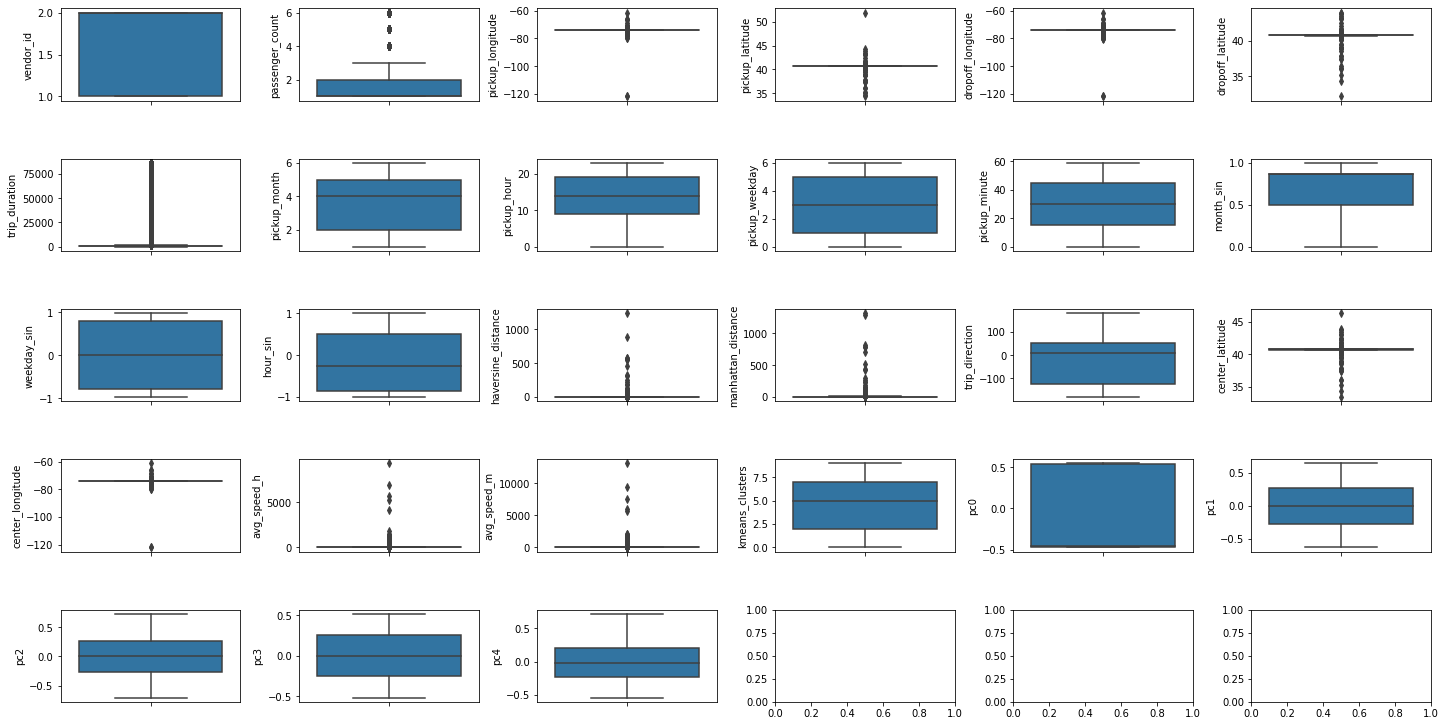

In [ ]:
numeric_columns_plot(df_nz[df_nz.describe().columns])

In [ ]:
df_nz=df_nz[(df_nz['avg_speed_h']<104) | (df_nz['avg_speed_m']<104)]

In [ ]:
df_for_pca=df_nz[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','vendor_id','pickup_weekday','pickup_month','pickup_minute','pickup_hour']]

In [ ]:
df_for_pca.shape

(1458418, 9)

In [ ]:
# we will try use pca to transform the week features to get imp information by combining all of assumed weak features.

#scaling the data before PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
scaler = MinMaxScaler()

features_scaled = scaler.fit_transform(df_for_pca)
pca = PCA(n_components=.90)
pca.fit(features_scaled)

features_after_pca = pca.transform(features_scaled)
features_after_pca.shape

(1458418, 5)

In [ ]:
df_after_pca=pd.DataFrame(features_after_pca)


In [ ]:
df_after_pca.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [ ]:
df_after_pca[df_after_pca.isnull()]=0

In [ ]:
df_nz['pc0'],df_nz['pc1'],df_nz['pc2'],df_nz['pc3'],df_nz['pc4']=df_after_pca[0],df_after_pca[1],df_after_pca[2],df_after_pca[3],df_after_pca[4]

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
wcss = []
for i in range(1,12):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(df_after_pca)
 wcss.append(kmeans.inertia_)
 print('Cluster', i, 'Inertia', kmeans.inertia_)
plt.plot(range(1,12),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

Cluster 1 Inertia 921012.326727856
Cluster 2 Inertia 558170.1103317933
Cluster 3 Inertia 490665.26026479725
Cluster 4 Inertia 432133.90911815315
Cluster 5 Inertia 394820.16654451715
Cluster 6 Inertia 362928.43053720787


KeyboardInterrupt: ignored

In [ ]:
kmean=KMeans(n_clusters=10)
kmean.fit(df_after_pca)

KMeans(n_clusters=10)

In [ ]:
df_nz['kmeans_clusters']=kmean.labels_

In [ ]:
def outliers_quartile_treatment(df,column_to_treat):
  q3=np.percentile(df[column_to_treat], 75.)
  q1=np.percentile(df[column_to_treat], 25.)
  iqr=(q3-q1)*1.5
  df=df[(df[column_to_treat] > (q1 - iqr)) & (df[column_to_treat] <= (q3 + iqr))]
  return df

In [ ]:
df_nz=outliers_quartile_treatment(df_nz,'trip_duration')

In [ ]:
# df_nz.to_csv('/content/drive/MyDrive/almabetter/capstone projects/NYC taxi trip duration -regression/featured_df.csv')
# df_nz=pd.read_csv('/content/drive/MyDrive/almabetter/capstone projects/NYC taxi trip duration -regression/featured_df.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


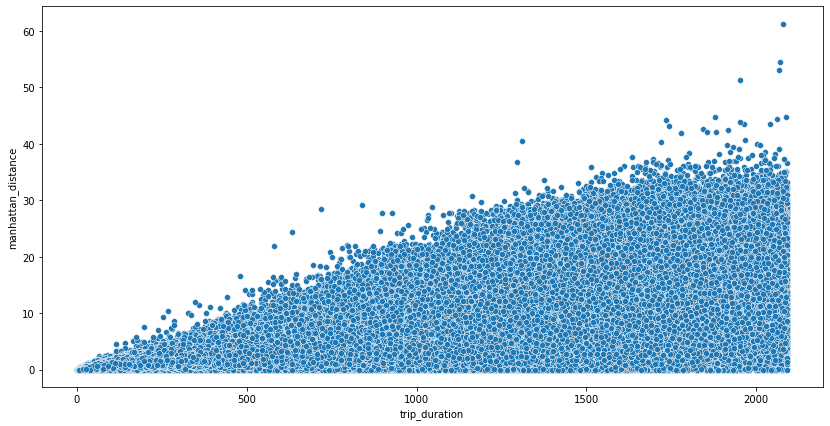

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(df_nz.trip_duration,df_nz.manhattan_distance)

In [ ]:
df_nz['day_session'] = np.nan
df_nz.loc[df_nz.pickup_hour < 7, 'day_session'] = '1'
df_nz.loc[(df_nz.pickup_hour >= 7) & (df_nz.pickup_hour < 18), 'day_session'] = '2'
df_nz.loc[(df_nz.pickup_hour >= 18) & (df_nz.pickup_hour < 21), 'day_session'] = '3'
df_nz.loc[(df_nz.pickup_hour >= 21) & (df_nz.pickup_hour <= 24), 'day_session'] = '4'


In [ ]:
df_nz.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,center_longitude,avg_speed_h,avg_speed_m,pc0,pc1,pc2,pc3,pc4,kmeans_clusters,day_session
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,...,-73.973392,11.856428,13.730901,-0.466398,-0.041027,-0.536987,-0.092055,-0.012076,5,2
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,...,-73.989948,9.803659,13.197318,0.542677,-0.321428,0.730156,0.234603,0.436043,2,1
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,...,-74.011154,12.465721,13.941241,-0.465847,-0.152132,-0.193410,0.038717,-0.184032,9,3
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,...,-73.972988,9.836594,9.926539,-0.466024,0.180793,0.284800,0.003794,-0.048192,7,2
5,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,...,-73.987469,8.930458,12.629906,-0.472220,0.546641,0.084888,-0.496490,-0.409554,7,4


In [ ]:
featured_df=df_nz.drop(['pickup_datetime', 'dropoff_datetime','pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag','pickup_month', 'pickup_day_name', 'pickup_weekday',
       'pickup_minute', 'pickup_day', 'dropoff_day', 'dropoff_day_name'],axis=1)

In [ ]:
# featured_df.to_csv('/content/drive/MyDrive/almabetter/capstone projects/NYC taxi trip duration -regression/featured_df.csv',index=False)
featured_df=pd.read_csv('/content/drive/MyDrive/almabetter/capstone projects/NYC taxi trip duration -regression/featured_df.csv')

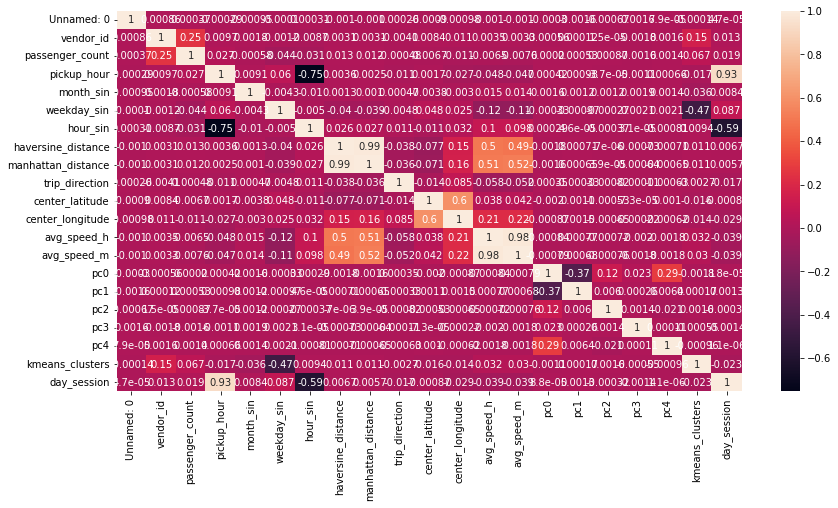

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(featured_df.drop('trip_duration',axis=1).corr(method='spearman'),annot=True)

In [ ]:
featured_df.head(
    
)

,vendor_id,passenger_count,trip_duration,pickup_hour,month_sin,weekday_sin,hour_sin,haversine_distance,manhattan_distance,trip_direction,...,center_longitude,avg_speed_h,avg_speed_m,pc0,pc1,pc2,pc3,pc4,kmeans_clusters,day_session
0,2,1,455,17,1.000000e+00,0.000000,-0.965926,1.498675,1.735711,99.974159,...,-73.973389,11.857645,13.733101,-0.466398,-0.041027,-0.536987,-0.092055,-0.012076,0,2
1,1,1,663,0,1.224647e-16,-0.781831,0.000000,1.805410,2.430516,-117.165634,...,-73.989944,9.803130,13.197373,0.542677,-0.321428,0.730156,0.234603,0.436043,8,1
2,2,1,429,19,8.660254e-01,0.974928,-0.965926,1.485300,1.661047,-172.736786,...,-74.011154,12.464054,13.938856,-0.465847,-0.152132,-0.193410,0.038717,-0.184032,3,3
3,2,1,435,13,1.000000e+00,-0.974928,-0.258819,1.188640,1.199515,179.473511,...,-73.972992,9.837023,9.927017,-0.466024,0.180793,0.284800,0.003794,-0.048192,7,2
4,2,6,443,22,5.000000e-01,-0.974928,-0.500000,1.099062,1.554349,-45.009193,...,-73.987473,8.931430,12.631282,-0.472220,0.546641,0.084888,-0.496490,-0.409554,7,4


In [ ]:
abs(featured_df.corr(method='spearman')['trip_duration'])

vendor_id             0.004990
passenger_count       0.021278
trip_duration         1.000000
pickup_hour           0.031573
month_sin             0.011047
weekday_sin           0.041582
hour_sin              0.032619
haversine_distance    0.772004
manhattan_distance    0.758698
trip_direction        0.001829
center_latitude       0.121385
center_longitude      0.063808
avg_speed_h           0.082153
avg_speed_m           0.085393
pc0                   0.001424
pc1                   0.000529
pc2                   0.000457
pc3                   0.000662
pc4                   0.000266
kmeans_clusters       0.012056
day_session           0.028608
Name: trip_duration, dtype: float64

In [ ]:
featured_df.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


vendor_id                  0.248879
passenger_count            1.723175
trip_duration         200764.284695
pickup_hour               41.716659
month_sin                  0.111363
weekday_sin                0.506170
hour_sin                   0.453942
haversine_distance         8.302943
manhattan_distance        14.267606
trip_direction         10951.936957
center_latitude            0.000724
center_longitude           0.004340
avg_speed_h               59.017277
avg_speed_m              106.787694
pc0                        0.248800
pc1                        0.113471
pc2                        0.107576
pc3                        0.086259
pc4                        0.075482
kmeans_clusters            7.723677
dtype: float64

In [ ]:
featured_df.columns

Index(['vendor_id', 'passenger_count', 'trip_duration', 'pickup_hour',
       'month_sin', 'weekday_sin', 'hour_sin', 'haversine_distance',
       'manhattan_distance', 'trip_direction', 'center_latitude',
       'center_longitude', 'avg_speed_h', 'avg_speed_m', 'pc0', 'pc1', 'pc2',
       'pc3', 'pc4', 'kmeans_clusters', 'day_session'],
      dtype='object')

In [ ]:
feature_col=['passenger_count','month_sin', 'weekday_sin', 'hour_sin', 'haversine_distance',
       'manhattan_distance', 'trip_direction', 'center_latitude',
       'center_longitude', 'pc0', 'pc1', 'pc2',
       'kmeans_clusters', 'day_session', 'avg_speed_h']



In [ ]:
feature=featured_df[feature_col]

label=featured_df['trip_duration']

In [ ]:
feature.kmeans_clusters=feature.kmeans_clusters.astype('category')
# feature.passenger_count=feature.passenger_count.astype('category')
feature.day_session=feature.day_session.astype('category')


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
feature_dummies=pd.get_dummies(feature,drop_first=True)

In [ ]:
# feature_dummies.isnull().sum()

feature_dummies[feature_dummies.isnull()]=0
feature_dummies=feature_dummies[['passenger_count', 'month_sin', 'weekday_sin', 'hour_sin',
       'haversine_distance', 'manhattan_distance', 'trip_direction',
       'center_latitude', 'center_longitude', 'pc0', 'pc1', 'pc2',
       'kmeans_clusters_1', 'kmeans_clusters_2',
       'kmeans_clusters_3', 'kmeans_clusters_4', 'kmeans_clusters_5',
       'kmeans_clusters_6', 'kmeans_clusters_7', 'kmeans_clusters_8',
       'kmeans_clusters_9', 'day_session_2', 'day_session_3', 'day_session_4','avg_speed_h']]
# feature_dummies.columns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score,ShuffleSplit,cross_val_predict

x_train,x_test,y_train,y_test=train_test_split(feature_dummies, label, test_size=0.45,random_state=40)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
# Evaluation metrics 
def print_metrics(actual,prediction,model=''):

  print(f"{model} R2    :", r2_score(actual,prediction))
  print(f"{model} MAE   :", mean_absolute_error(actual,prediction))
  print(f"{model} MSE   :", mean_squared_error(actual,prediction))
  print(f"{model} RMSE  :", np.sqrt(mean_squared_error(actual,prediction)))
  

In [ ]:

#baseline model
test=pd.DataFrame()
test['y_test']=pd.DataFrame(y_test.values)
test['ymean']=test.y_test.mean()

print_metrics((test['y_test']),(test['ymean']),'Base')


Base R2    : 0.0
Base MAE   : 360.98335604429946
Base MSE   : 200661.9712283464
Base RMSE  : 447.95309043285596


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train,y_train)
y_train_pred = cross_val_predict(lr,x_train,y_train,cv=5)
y_pred=lr.predict(x_test)
print_metrics((y_train),(y_train_pred),'LR_train')
print_metrics((y_test),(y_pred),'LR_test')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

LR_train R2    : 0.7560092519313942
LR_train MAE   : 155.15958544849238
LR_train MSE   : 49004.96215028062
LR_train RMSE  : 221.3706442830228
LR_test R2    : 0.7560284655560765
LR_test MAE   : 155.4847274372923
LR_test MSE   : 48955.80902512211
LR_test RMSE  : 221.25959645882506
Adjusted R2 :  0.7560080967624501


In [ ]:
# checking for cv score to know whether our model is generalize with shuffle splits also or not
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(lr,x_train,y_train, cv=cv)

array([0.75681242, 0.75620728, 0.75633197, 0.75567266, 0.75759268])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(criterion='squared_error',random_state=100,n_estimators=6,max_depth=8).fit(x_train,y_train)
y_train_pred = cross_val_predict(rf,x_train,y_train,cv=5)
y_pred=rf.predict(x_test)
print_metrics((y_train),(y_train_pred),'rf_train')
print_metrics((y_test),(y_pred),'rf_test')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

rf_train R2    : 0.982641829780554
rf_train MAE   : 30.8588433883085
rf_train MSE   : 3486.347254293805
rf_train RMSE  : 59.04529832504706
rf_test R2    : 0.9811046303680149
rf_test MAE   : 33.019524651152686
rf_test MSE   : 3791.5821174423627
rf_test RMSE  : 61.57582413124783
Adjusted R2 :  0.9811038719661692


Text(0, 0.5, 'feature')

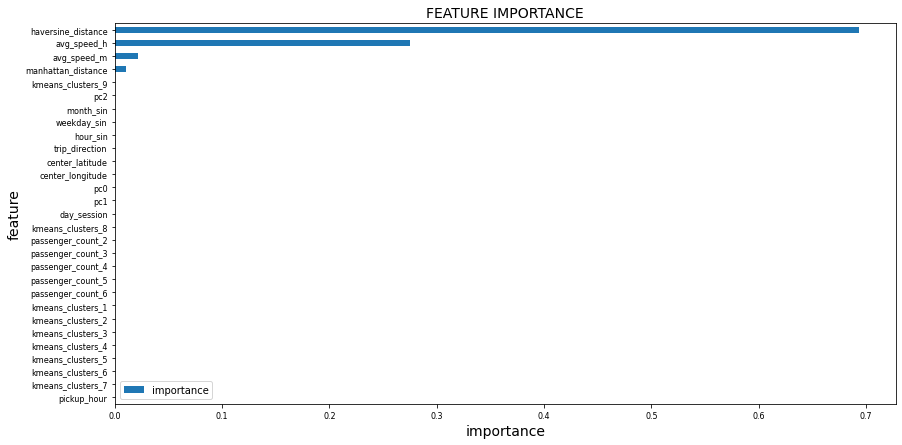

In [ ]:
pd.DataFrame({'feature':feature_dummies.columns, \
              'importance': rf.feature_importances_})\
              .sort_values('importance')\
              .set_index('feature')\
              .plot(kind='barh', fontsize=8,figsize=(14,7))

plt.title('FEATURE IMPORTANCE',fontsize=14 )
plt.xlabel('importance',fontsize=14)
plt.ylabel('feature',fontsize=14)

In [ ]:
tuning_feature_dummies=feature_dummies[['month_sin', 'weekday_sin', 'hour_sin',
       'haversine_distance', 'manhattan_distance', 'trip_direction',
       'center_latitude', 'center_longitude', 'avg_speed_h', 'avg_speed_m',
       'pc0', 'pc1', 'day_session', 'passenger_count_2',
       'kmeans_clusters_8','kmeans_clusters_9']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(tuning_feature_dummies, label, test_size=0.45,random_state=40)

scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

param_grid = {
    'n_estimators' : np.arange(1,10,2),
    'max_depth': [3,4,5,6,7,8],
}

In [ ]:
rf_tuned=RandomizedSearchCV(rf, param_grid, cv=cv, n_iter = 10)

In [ ]:
rf_tuned.fit(x_train,y_train)

RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None),
                   estimator=RandomForestRegressor(max_depth=8, n_estimators=6,
                                                   random_state=100),
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8],
                                        'n_estimators': array([1, 3, 5, 7, 9])})

In [ ]:
y_train_pred = rf_tuned.predict(x_train)
y_pred=rf_tuned.predict(x_test)
print_metrics((y_train),(y_train_pred),'rf_train')
print_metrics((y_test),(y_pred),'rf_test')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

rf_train  R2: 0.9824564697279385
rf_train  MAE: 31.356472281434197
rf_train  MSE: 3523.5763805393917
rf_train  RMSE: 59.35972018582459
rf_test  R2: 0.9817423811313796
rf_test  MAE: 31.639363252566692
rf_test  MSE: 3663.6097921132264
rf_test  RMSE: 60.527760507995225
Adjusted R2 :  0.9817418828307214


In [ ]:
# pip install shap

In [ ]:
# x_test=pd.DataFrame(x_test[0])

In [ ]:
import shap

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf)
# Calculate Shap values
shap_values = explainer.shap_values(x_test)

In [ ]:
# features=feature_dummies.columns


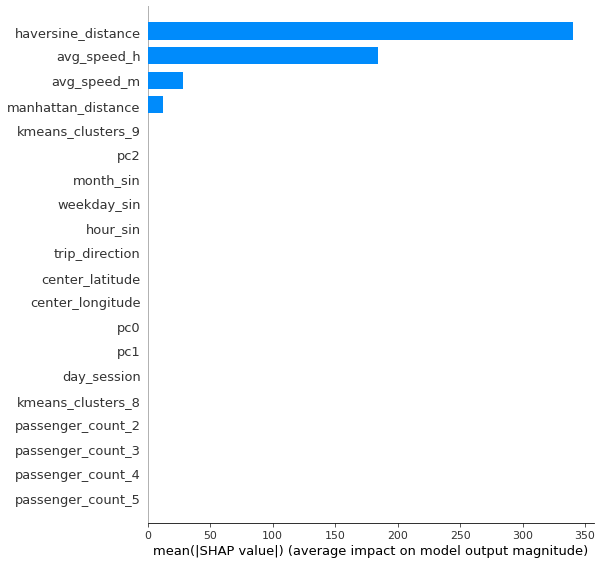

In [ ]:
shap.summary_plot(shap_values, x_test, feature_names=features, plot_type="bar")

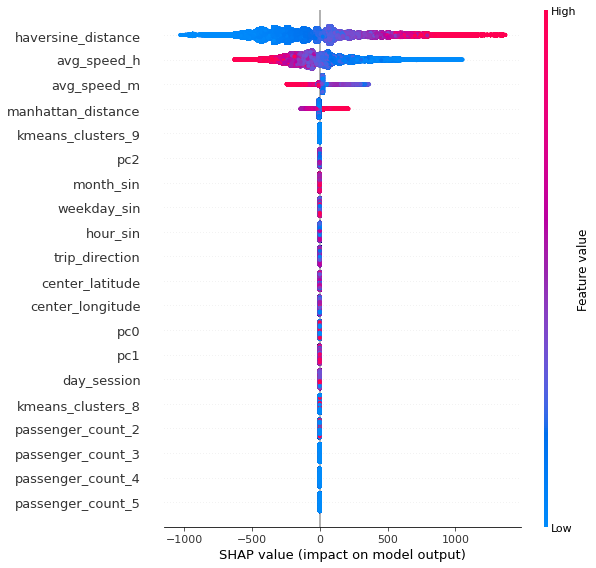

In [ ]:
shap.summary_plot(shap_values, x_test, feature_names=features)

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
i = 18
shap.force_plot(explainer.expected_value, shap_values[i], x_test[i], feature_names = features)

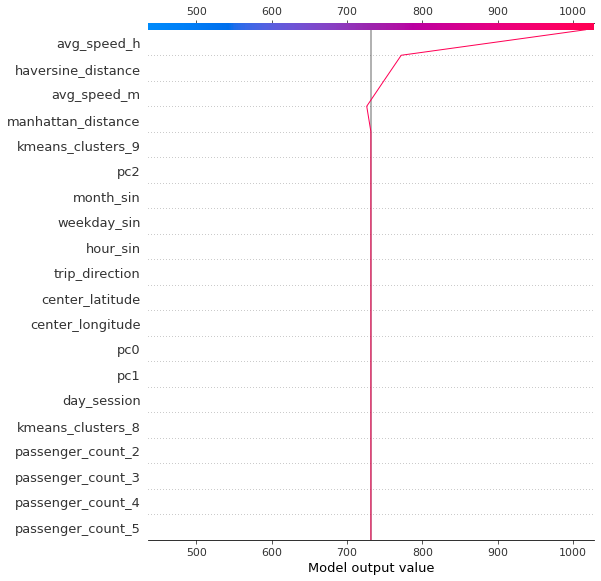

In [ ]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], feature_names = list(features))

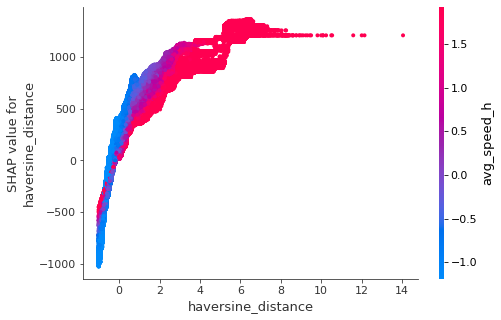

In [ ]:
shap.dependence_plot(4, shap_values, x_test, feature_names=features)

In [ ]:
# visualize the first 5 predictions explanations with a dark red dark blue color map.
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0:5,:], x_test[0:5,:], plot_cmap="DrDb", feature_names=features)

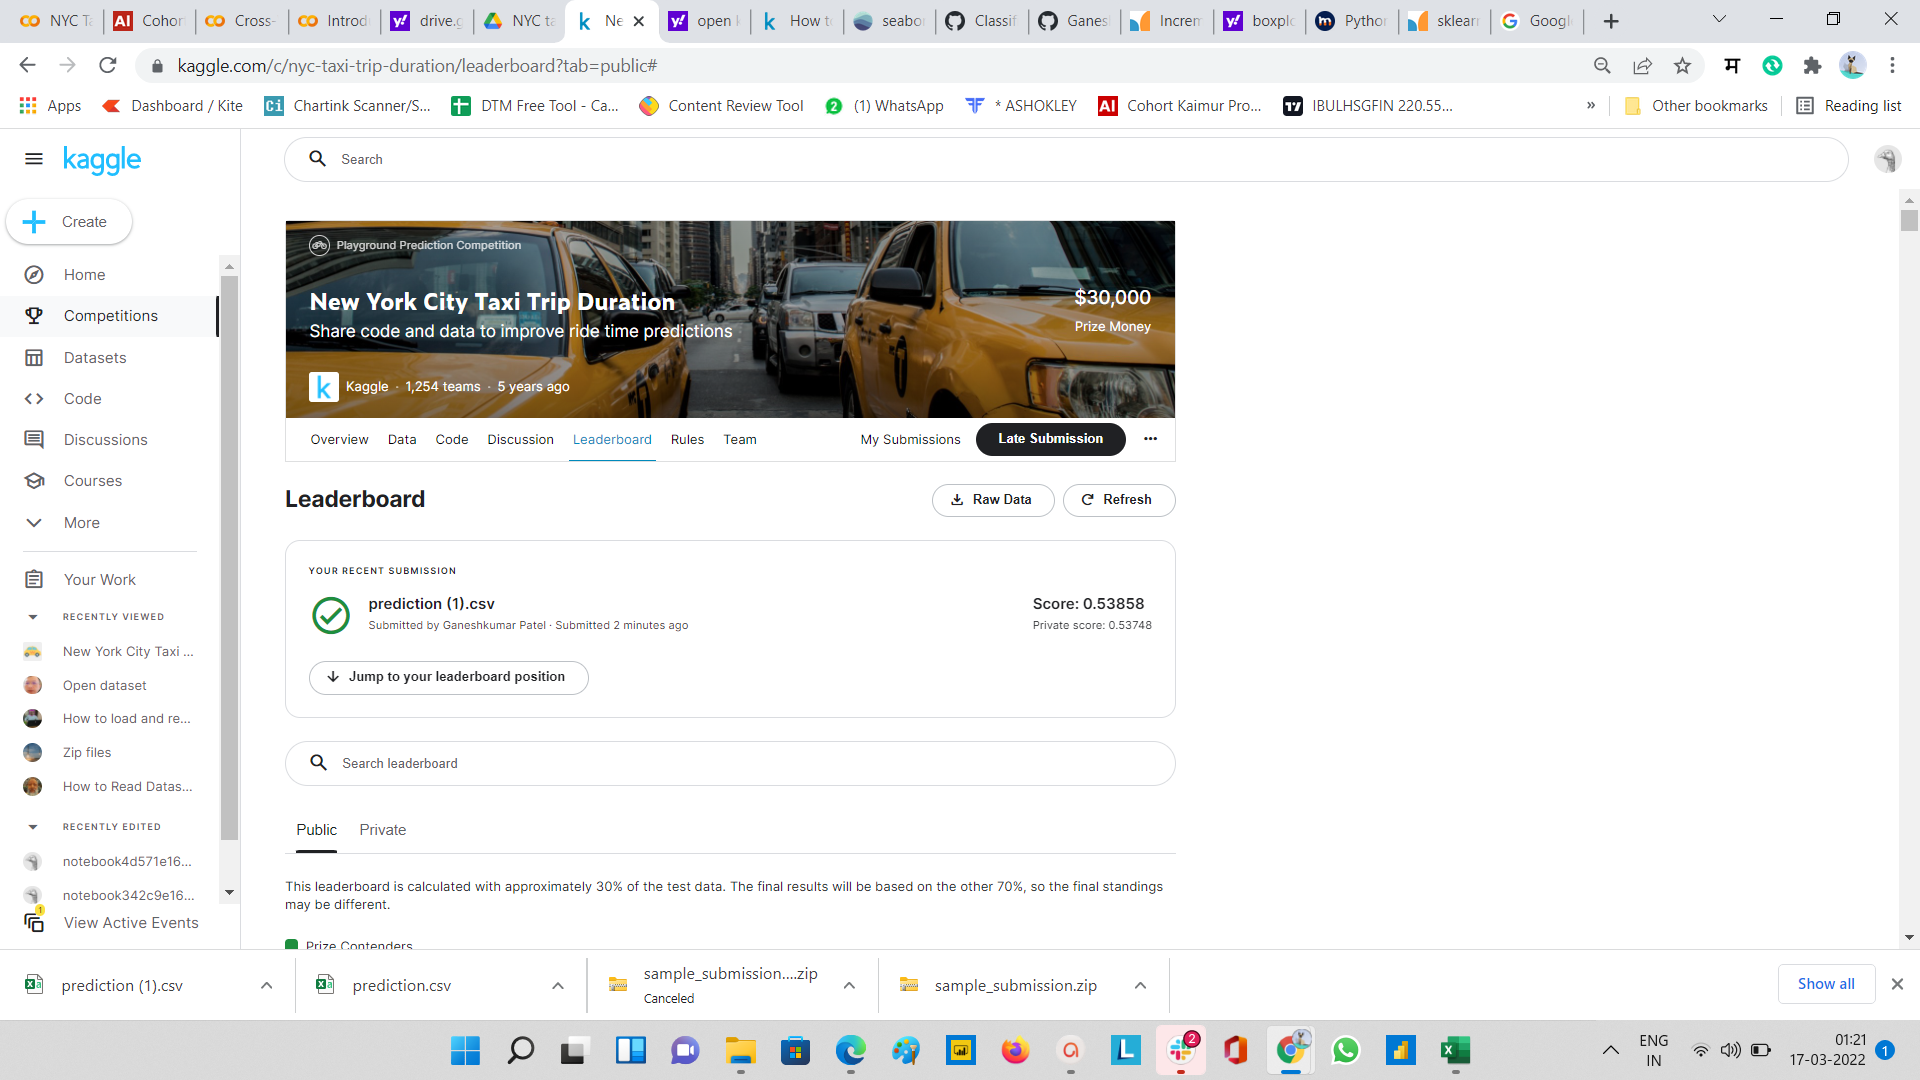

In [ ]:
# Speed pred model


# feature_speed_col=['passenger_count','month_sin', 'weekday_sin', 'hour_sin', 'haversine_distance',
#        'manhattan_distance', 'trip_direction', 'center_latitude',
#        'center_longitude','pc0', 'pc1', 'pc2',
#        'kmeans_clusters', 'day_session']


feature_speed_col=['hour_sin', 'haversine_distance',
       'manhattan_distance', 'trip_direction', 
       'kmeans_clusters', 'day_session']

feature_speed=featured_df[feature_speed_col]

label_speed=featured_df['avg_speed_h']


feature_speed.kmeans_clusters=feature_speed.kmeans_clusters.astype('category')
feature_speed.day_session=feature_speed.day_session.astype('category')
feature_speed_dummies=pd.get_dummies(feature_speed,drop_first=True)
feature_speed_dummies[feature_speed_dummies.isnull()]=0


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score,ShuffleSplit,cross_val_predict

x_train_s,x_test_s,y_train_s,y_test_s=train_test_split(feature_speed_dummies, label_speed, test_size=0.2,random_state=40)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_s=scaler.fit_transform(x_train_s)
x_test_s=scaler.transform(x_test_s)


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_avg_speed = RandomForestRegressor(criterion='squared_error',random_state=100,n_estimators=100,max_depth=8).fit(x_train_s,y_train_s)
y_train_pred_s=rf_avg_speed.predict(x_train_s)
y_pred_s=rf_avg_speed.predict(x_test_s)
print_metrics((y_train_s),(y_train_pred_s),'rf_avg_speed_train')
print_metrics((y_test_s),(y_pred_s),'rf_avg_speed_test')
print("Adjusted R2 : ",1-(1-r2_score((y_test_s), (y_pred_s)))*((x_test_s.shape[0]-1)/(x_test_s.shape[0]-x_test_s.shape[1]-1)))


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


rf_avg_speed_train R2    : 0.5287898592097962
rf_avg_speed_train MAE   : 3.8655854667683887
rf_avg_speed_train MSE   : 27.830702624098123
rf_avg_speed_train RMSE  : 5.275481269429181
rf_avg_speed_test R2    : 0.5291235297880441
rf_avg_speed_test MAE   : 3.8637261203560884
rf_avg_speed_test MSE   : 27.705012395315457
rf_avg_speed_test RMSE  : 5.263555109934297
Adjusted R2 :  0.5290963139530458


In [ ]:
test=pd.read_csv(path+'test.csv')
test_id=test.drop('id',axis=1)
test_id.pickup_datetime = pd.to_datetime(test_id.pickup_datetime)
test_id['pickup_month']=test_id.pickup_datetime.dt.month
test_id['pickup_day_name']=test_id.pickup_datetime.dt.day_name()
test_id['pickup_hour']=test_id.pickup_datetime.dt.hour
test_id['pickup_weekday']=test_id.pickup_datetime.dt.weekday
test_id['pickup_minute']=test_id.pickup_datetime.dt.minute
test_id['pickup_day']=test_id.pickup_datetime.dt.date


test_id['month_sin']=test_id['pickup_month'].apply(lambda x: np.sin(x / 12 * 2 * np.pi))

test_id['weekday_sin']=test_id['pickup_weekday'].apply(lambda x: np.sin(x / 7 * 2 * np.pi))

test_id['hour_sin']=test_id['pickup_hour'].apply(lambda x: np.sin(x / 24 * 2 * np.pi))

test_id['haversine_distance']=get_haversine_distance(test_id['pickup_latitude'].values,test_id['pickup_longitude'].values,test_id['dropoff_latitude'].values,test_id['dropoff_longitude'].values)

test_id['manhattan_distance']=get_manhattan_distance(test_id['pickup_latitude'].values,test_id['pickup_longitude'].values,test_id['dropoff_latitude'].values,test_id['dropoff_longitude'].values)

test_id['trip_direction']=get_direction(test_id['pickup_latitude'].values,test_id['pickup_longitude'].values,test_id['dropoff_latitude'].values,test_id['dropoff_longitude'].values)

test_id['center_latitude'] = (test_id['pickup_latitude'].values + test_id['dropoff_latitude'].values) / 2
test_id['center_longitude'] = (test_id['pickup_longitude'].values + test_id['dropoff_longitude'].values) / 2

#PCA
test_for_pca=test_id[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','vendor_id','pickup_weekday','pickup_month','pickup_minute','pickup_hour']]

#scaling the data before PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
scaler = MinMaxScaler()

features_scaled_test = scaler.fit_transform(test_for_pca)
pca = PCA(n_components=.90)
pca.fit(features_scaled_test)

features_pca_test = pca.transform(features_scaled_test)
test_after_pca=pd.DataFrame(features_pca_test)
test_after_pca[test_after_pca.isnull()]=0
test_id['pc0'],test_id['pc1'],test_id['pc2'],test_id['pc3'],test_id['pc4']=test_after_pca[0],test_after_pca[1],test_after_pca[2],test_after_pca[3],test_after_pca[4]

from sklearn.cluster import KMeans
kmean=KMeans(n_clusters=10)
kmean.fit(test_after_pca)
test_id['kmeans_clusters']=kmean.labels_


test_id['day_session'] = np.nan
test_id.loc[test_id.pickup_hour < 7, 'day_session'] = '1'
test_id.loc[(test_id.pickup_hour >= 7) & (test_id.pickup_hour < 18), 'day_session'] = '2'
test_id.loc[(test_id.pickup_hour >= 18) & (test_id.pickup_hour < 21), 'day_session'] = '3'
test_id.loc[(test_id.pickup_hour >= 21) & (test_id.pickup_hour <= 24), 'day_session'] = '4'

featured_test=test_id.drop(['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag','pickup_month', 'pickup_day_name', 'pickup_weekday',
       'pickup_minute', 'pickup_day'],axis=1)

feature_col=['passenger_count','month_sin', 'weekday_sin', 'hour_sin', 'haversine_distance',
       'manhattan_distance', 'trip_direction', 'center_latitude',
       'center_longitude','pc0', 'pc1', 'pc2',
       'kmeans_clusters', 'day_session']

test_feature=featured_test[feature_col]


test_feature.kmeans_clusters=test_feature.kmeans_clusters.astype('category')

test_feature.day_session=test_feature.day_session.astype('category')


feature_dummies_test=pd.get_dummies(test_feature,drop_first=True)
feature_dummies_test[feature_dummies_test.isnull()]=0

from sklearn.preprocessing import StandardScaler

feature_speed_col=['hour_sin', 'haversine_distance',
       'manhattan_distance', 'trip_direction', 
       'kmeans_clusters', 'day_session']
       
speed_test_feature=featured_test[feature_speed_col]


speed_test_feature.kmeans_clusters=speed_test_feature.kmeans_clusters.astype('category')

speed_test_feature.day_session=speed_test_feature.day_session.astype('category')


feature_speed_t=pd.get_dummies(speed_test_feature,drop_first=True)
feature_speed_t[feature_speed_t.isnull()]=0





scaler = StandardScaler()
feature_speed_t_scaled=scaler.fit_transform(feature_speed_t)


y_pred_s=rf_avg_speed.predict(feature_speed_t_scaled)
y_pred_s
feature_dummies_test['avg_speed_h']=y_pred_s

feature_dummies_test_scaled=scaler.fit_transform(feature_dummies_test)

y_pred_test=rf.predict(feature_dummies_test_scaled)




/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
submission=pd.DataFrame(y_pred_test,test['id'],columns=['trip_duration'])

In [ ]:
submission.to_csv('submission_trip_duration.csv')

In [ ]:
feature_dummies_test.columns

Index(['month_sin', 'weekday_sin', 'hour_sin', 'haversine_distance',
       'manhattan_distance', 'trip_direction', 'center_latitude',
       'center_longitude', 'pc0', 'pc1', 'pc2', 'passenger_count_1',
       'passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6', 'passenger_count_9',
       'kmeans_clusters_1', 'kmeans_clusters_2', 'kmeans_clusters_3',
       'kmeans_clusters_4', 'kmeans_clusters_5', 'kmeans_clusters_6',
       'kmeans_clusters_7', 'kmeans_clusters_8', 'kmeans_clusters_9',
       'day_session_2', 'day_session_3', 'day_session_4'],
      dtype='object')